# **Use the following dataset about adults:**

In [2]:
#read in & print the data file:
import pandas as pd
adults  = pd.read_csv("https://raw.githubusercontent.com/CalColistra/IDS/main/Project4/problem1/adult_training.csv");
adults

,age,workclass,education,maritalStatus,occupation,sex,capitalGain,capitalLoss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [3]:
#check data types:
adults.dtypes

age               int64
workclass        object
education         int64
maritalStatus    object
occupation       object
sex              object
capitalGain       int64
capitalLoss       int64
income           object
dtype: object

# **Create a contingency table of workclass and sex, and plot it.**

sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


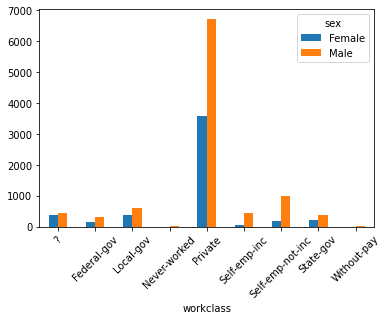

In [4]:
#Cross tabulation of workclass and sex:
p_crosstab = pd.crosstab(adults.workclass, adults.sex)
print(p_crosstab)
#plot it:
barplot = p_crosstab.plot.bar(rot=45)

**Summary:**
The contingency table between work class and sex shows how the workclass of the majority of people in the dataset is private and, of those who have a private workclass, there is almost double the amount of males than there are females.

# **Create a contingency table of sex and marital status, and plot it.**

sex                    Female  Male
maritalStatus                      
Divorced                 1219   795
Married-AF-spouse           7     4
Married-civ-spouse        761  6010
Married-spouse-absent      95   104
Never-married            2160  2717
Separated                 290   182
Widowed                   380    73


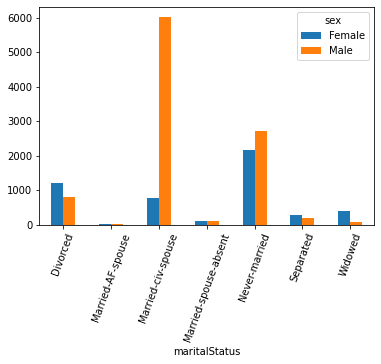

In [6]:
#Cross tabulation of sex and marital status:
p_crosstab = pd.crosstab(adults.maritalStatus, adults.sex)
print(p_crosstab)
#plot it:
barplot = p_crosstab.plot.bar(rot=70)

**Summary:**
The contingency table between sex and marital status shows how most of the dataset is either married-civ-spouse or never married.  For married-civ-spouse, there are much more males than females and for never married there is a more even ratio between males and females because both males and females fall in the ragne: 2100-3000.

# **Create a new data frame, adultOver40, for those whose age > 40.**

In [8]:
#copy original df into new one:
adultOver40 = adults.copy()
#drop all rows where age is under 41:
adultOver40.drop(adultOver40[adultOver40['age'] < 41].index, inplace = True)
#print:
adultOver40

,age,workclass,education,maritalStatus,occupation,sex,capitalGain,capitalLoss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


# **Recreate the contingency table of sex and marital status for adultOver40.**

sex                    Female  Male
maritalStatus                      
Divorced                  720   448
Married-civ-spouse        305  3383
Married-spouse-absent      38    47
Never-married             256   315
Separated                 133    74
Widowed                   354    71


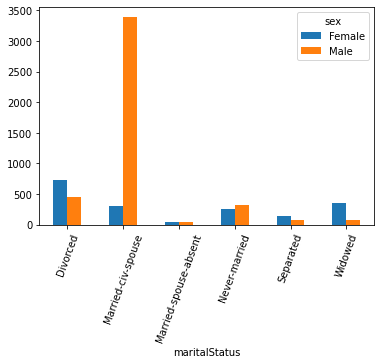

In [9]:
#Cross tabulation of sex and marital status:
p_crosstab = pd.crosstab(adultOver40.maritalStatus, adultOver40.sex)
print(p_crosstab)
#plot it:
barplot = p_crosstab.plot.bar(rot=70)

**Summary:**
When I removed those who are under 41 years old, I noticed that there are much less who fall under the never married category.  The category that has the most females is divorced and the cetegory with the most males is married-civ-spouse.

# **Determine whether any outliers exist for the education field.**

In [ ]:
#import & initialize the standard scaler:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scale "education" column and place values in new column:
adults['education_scaled'] = scaler.fit_transform(adults[["education"]])
#check if mean = 0 after standardization:
m1 = adults['education_scaled'].mean()
print("The new shifted mean: %6.6f" % (m1))

The new shifted mean: -0.000000


In [ ]:
#make new df with outliers for education:
education_outliers = adults.query('(education_scaled > 3) | (education_scaled < -3)')
#print how many outliers are there:
print("number of outliers in education =", len(education_outliers))

number of outliers in education = 113


# **Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?**

In [ ]:
#scale "age" column and place values in new column:
adults['age_scaled'] = scaler.fit_transform(adults[["age"]])
#check if mean = 0 after standardization:
m1 = adults['age_scaled'].mean()
print("The new shifted mean: %6.6f" % (m1))
#make new df with outliers for age:
age_outliers = adults.query('(age_scaled > 3) | (age_scaled < -3)')
#print how many outliers there are:
print("Number of outliers in 'age' column = ", len(age_outliers))

The new shifted mean: 0.000000
Number of outliers in 'age' column =  60


In [ ]:
#show the most extreme outliers:
age_outliers.sort_values(by='age_scaled', ascending = False)

,age,workclass,education,maritalStatus,occupation,sex,capitalGain,capitalLoss,income,education_scaled,age_scaled
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,-0.411359,3.751354
4114,90,?,9,Widowed,?,Female,0,4356,<=50K,-0.411359,3.751354
8921,90,Private,9,Married-civ-spouse,Machine-op-inspct,Male,0,0,<=50K,-0.411359,3.751354
8785,90,Private,10,Divorced,Sales,Female,0,0,<=50K,-0.026479,3.751354
8608,90,Private,14,Never-married,Exec-managerial,Female,0,0,<=50K,1.513043,3.751354
11091,90,?,2,Widowed,?,Female,0,0,<=50K,-3.105523,3.751354
8405,90,Private,13,Never-married,Prof-specialty,Female,0,0,<=50K,1.128163,3.751354
11562,90,?,4,Separated,?,Female,0,0,<=50K,-2.335762,3.751354
7254,90,Private,13,Married-civ-spouse,Exec-managerial,Female,0,0,>50K,1.128163,3.751354
6476,90,Local-gov,12,Married-civ-spouse,Adm-clerical,Male,0,0,<=50K,0.743282,3.751354


Those of age 90 are tied for the most extreme outlier because they have the highest standard deviation of 3.75.

# **Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.**

In [ ]:
#make a new df with only those of age over 79:
over_79 = adults.query('age > 79')
print("There are", len(over_79), "rows with age of at least 80")

There are 60 rows with age of at least 80


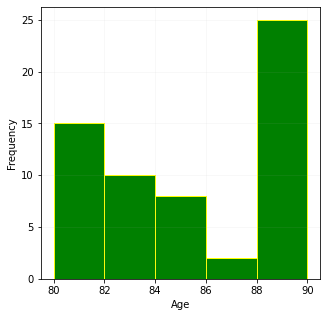

In [ ]:
#plot a histogram of rows with age of at least 80:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.hist(over_79['age'], bins=5, color="green", edgecolor="yellow")
plt.xlabel('Age')
plt.ylabel('Frequency')
# alpha is the % of transparency
plt.grid(axis='y', alpha=0.1)
plt.grid(axis='x', alpha=0.1)
plt.show()

Of the 60 outliers, most (25) of them are in range [88, 90] and only about 2 are in range [86,88].